In [59]:
import geopandas as gpd
import pandas as pd
import statsmodels
import numpy as np
import seaborn as sns

In [2]:
gdf = gpd.read_file('data/ZCTA.gpkg', index_col='ZCTA')

In [3]:
dfreqs = pd.read_csv('data/Forestry_Service_Requests_20250516.csv')

/tmp/ipykernel_21445/4021906680.py:1: DtypeWarning: Columns (18,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dfreqs = pd.read_csv('data/Forestry_Service_Requests_20250516.csv')


In [31]:
hvi = pd.read_csv('data/Heat_Vulnerability_Index_Rankings_20250516.csv').rename(
    columns={
        'ZIP Code Tabulation Area (ZCTA) 2020': 'ZCTA',
    }
)

In [32]:
hvi.head()

,ZCTA,Heat Vulnerability Index (HVI)
0,10465,1
1,10310,3
2,11203,5
3,11224,5
4,11212,5


In [4]:
dfreqs.head()

,OBJECTID,ComplaintNumber,SRCategory,SRType,SRPriority,SRSource,SRStatus,SRResolution,BoroughCode,CommunityBoard,...,SRCallerType,CallerCity,CallerState,Latitude,Longitude,Census Tract,BIN,BBL,NTA,Location
0,5474367,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Open,Reviewed - Inspection Assigned,Manhattan,164.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,POINT (-73.97619881851097 40.774632479501406)
1,5483959,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Open,Reviewed - Inspection Assigned,Manhattan,107.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,POINT (-73.9822254343175 40.7868954660533)
2,5445960,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Closed,Inspected - Tentatively Approved for Planting,Brooklyn,308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,POINT (-73.96590517024015 40.676752787783194)
3,2503557,NaN,Plant Tree,Street Tree,Routine,Department of Parks and Recreation - Public We...,Closed,T/S No Action - Ineligible,Staten Island,502.0,...,NaN,na,NY,NaN,NaN,NaN,NaN,NaN,/,POINT (-74.11984362732359 40.60949600575384)
4,5537160,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Open,Reviewed - Inspection Assigned,Bronx,228.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,POINT (-73.82377846358348 40.848357036646625)


In [5]:
# Convert the dfreqs Location column to a GeoSeries
# First extract the coordinates from the Location column
dfreqs['geometry'] = gpd.GeoSeries.from_wkt(dfreqs['Location'])

# Convert dfreqs to a GeoDataFrame
dfreqs_gdf = gpd.GeoDataFrame(dfreqs, geometry='geometry', crs="EPSG:4326")

# Make sure both GeoDataFrames have the same CRS
if gdf.crs != dfreqs_gdf.crs:
    dfreqs_gdf = dfreqs_gdf.to_crs(gdf.crs)

# Perform spatial join
joined_gdf = gpd.sjoin(dfreqs_gdf, gdf, how='left', op='within')

# Check the result
print(f"Shape of original dfreqs: {dfreqs.shape}")
print(f"Shape of joined data: {joined_gdf.shape}")
print(f"Number of matches: {joined_gdf.dropna(subset=['ZCTA']).shape[0]}")
joined_gdf.head()

/home/nkgarg/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Shape of original dfreqs: (192072, 48)
Shape of joined data: (192072, 68)
Number of matches: 191931


,OBJECTID,ComplaintNumber,SRCategory,SRType,SRPriority,SRSource,SRStatus,SRResolution,BoroughCode,CommunityBoard,...,Households_LivingAlone,OccupiedHomes,OccupiedHomes_Renter,Language_Total,Language_EnglishOnly,Language_Spanish,Language_AsianPI,Language_OtherIE,Language_Other,Income_Median
0,5474367,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Open,Reviewed - Inspection Assigned,Manhattan,164.0,...,22058.0,37878.0,24022.0,33770.0,25181.0,2117.0,1878.0,3683.0,911.0,93128.0
1,5483959,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Open,Reviewed - Inspection Assigned,Manhattan,107.0,...,16379.0,30189.0,19270.0,28850.0,21414.0,2435.0,1005.0,3268.0,728.0,79749.0
2,5445960,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Closed,Inspected - Tentatively Approved for Planting,Brooklyn,308.0,...,15031.0,27473.0,20436.0,25443.0,19313.0,1889.0,1317.0,2298.0,626.0,58757.0
3,2503557,NaN,Plant Tree,Street Tree,Routine,Department of Parks and Recreation - Public We...,Closed,T/S No Action - Ineligible,Staten Island,502.0,...,8896.0,31975.0,10622.0,31363.0,18280.0,3431.0,3578.0,4309.0,1765.0,39692.0
4,5537160,NaN,Plant Tree,Park Tree,Routine,Park Inspection Program,Open,Reviewed - Inspection Assigned,Bronx,228.0,...,5325.0,16585.0,8123.0,16122.0,7404.0,6481.0,350.0,1657.0,230.0,37026.0


In [6]:
joined_gdf.columns

Index(['OBJECTID', 'ComplaintNumber', 'SRCategory', 'SRType', 'SRPriority',
       'SRSource', 'SRStatus', 'SRResolution', 'BoroughCode', 'CommunityBoard',
       'BuildingNumber', 'StreetName', 'CrossStreet1', 'CrossStreet2',
       'TaxClass', 'LocationDetails', 'ComplaintDetails', 'ParkName',
       'ParkZone', 'NotesToCustomer', 'Postcode', 'Council District ',
       'StateSenate', 'StateAssembly', 'Congressional', 'SanitationZone',
       'PhysicalID', 'ServiceRequestParentGlobalID', 'Geometry', 'GlobalID',
       'InitiatedDate', 'ClosedDate', 'CreatedDate', 'UpdatedDate',
       'Descriptor1', 'ComplaintType', 'CallerZipCode', 'SRCallerType',
       'CallerCity', 'CallerState', 'Latitude', 'Longitude', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'Location', 'geometry', 'index_right', 'ZCTA',
       'Population', 'Race_White', 'Race_Black', 'Race_Asian', 'Race_Hispanic',
       'Age_Median', 'Households', 'Households_Family',
       'Households_LivingAlone', 'OccupiedHomes', 'Oc

In [7]:
counts_by_zcta = joined_gdf.groupby('ZCTA').size().reset_index(name='counts')


In [8]:
counts_by_zcta

,ZCTA,counts
0,10001.0,776
1,10002.0,1300
2,10003.0,2126
3,10004.0,82
4,10005.0,70
...,...,...
198,11691.0,408
199,11692.0,119
200,11693.0,305
201,11694.0,1370


In [33]:
df = counts_by_zcta.merge(gdf, on='ZCTA', how='left').merge(hvi, on='ZCTA', how='left')
df.head()

,ZCTA,counts,Population,Race_White,Race_Black,Race_Asian,Race_Hispanic,Age_Median,Households,Households_Family,...,OccupiedHomes_Renter,Language_Total,Language_EnglishOnly,Language_Spanish,Language_AsianPI,Language_OtherIE,Language_Other,Income_Median,geometry,Heat Vulnerability Index (HVI)
0,10001.0,776,32612.0,14845.0,2950.0,6005.0,7279.0,34.0,16624.0,5209.0,...,13375.0,13311.0,9270.0,1513.0,1586.0,859.0,83.0,70125.0,"POLYGON ((-74.00832 40.75249, -74.00822 40.753...",2.0
1,10002.0,1300,82155.0,19440.0,6541.0,33312.0,20147.0,41.0,36733.0,17849.0,...,30745.0,33790.0,13661.0,6023.0,12316.0,1396.0,394.0,20899.0,"POLYGON ((-73.99709 40.71462, -73.99681 40.715...",3.0
2,10003.0,2126,57076.0,38025.0,2194.0,8141.0,5391.0,31.7,28366.0,7890.0,...,19688.0,25158.0,19355.0,1628.0,1376.0,2645.0,154.0,70548.0,"POLYGON ((-73.99911 40.73163, -73.99861 40.732...",2.0
3,10004.0,82,4287.0,2409.0,189.0,932.0,443.0,34.5,2000.0,867.0,...,1321.0,1822.0,1405.0,73.0,75.0,269.0,0.0,110819.0,"MULTIPOLYGON (((-74.01765 40.70406, -74.01755 ...",1.0
4,10005.0,70,10639.0,6754.0,386.0,1950.0,935.0,30.8,5882.0,1891.0,...,5052.0,4649.0,3181.0,247.0,759.0,412.0,50.0,106250.0,"POLYGON ((-74.01195 40.70745, -74.01170 40.707...",1.0


In [11]:
df.columns

Index(['ZCTA', 'counts', 'Population', 'Race_White', 'Race_Black',
       'Race_Asian', 'Race_Hispanic', 'Age_Median', 'Households',
       'Households_Family', 'Households_LivingAlone', 'OccupiedHomes',
       'OccupiedHomes_Renter', 'Language_Total', 'Language_EnglishOnly',
       'Language_Spanish', 'Language_AsianPI', 'Language_OtherIE',
       'Language_Other', 'Income_Median', 'geometry'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'counts'}>]], dtype=object)

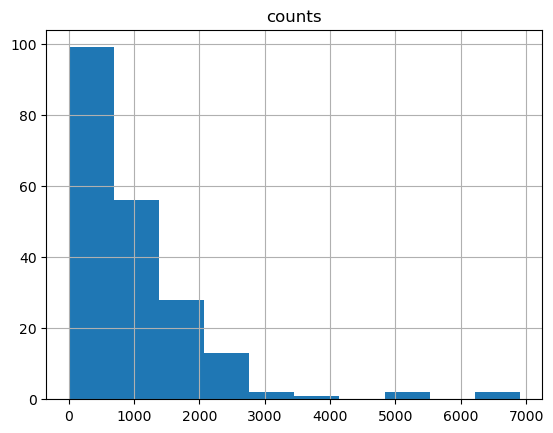

In [17]:
df.hist('counts')

array([[<AxesSubplot: title={'center': 'Population'}>]], dtype=object)

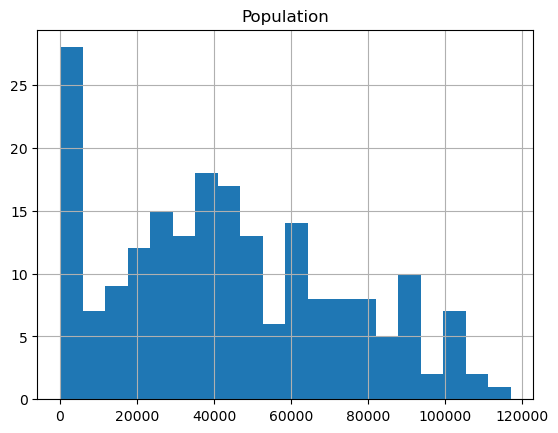

In [18]:
df.hist("Population", bins=20)

In [44]:
df['log_population'] = df['Population'].apply(lambda x: 0 if x == 0 else np.log(x))
df['log_median_income'] = df['Income_Median'].apply(lambda x: 0 if x == 0 else np.log(x))
df['HVI_rank'] = df['Heat Vulnerability Index (HVI)']

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# regression of counts by Population and income_median using statsmodels formula
import statsmodels.formula.api as smf

# Define the formula
formula = "counts ~ log_population + log_median_income + HVI_rank"

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Display the summary
print(model.summary())
# # Check for multicollinearity

# # Create a dataframe with the independent variables
# X = df[['Population', 'Income_Median']].dropna()

# # Calculate VIF for each predictor
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print("\nVariance Inflation Factors:")
# print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     34.18
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.04e-17
Time:                        18:54:17   Log-Likelihood:                -1444.3
No. Observations:                 178   AIC:                             2897.
Df Residuals:                     174   BIC:                             2909.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.372e+04   2762.06

In [51]:
dfg = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

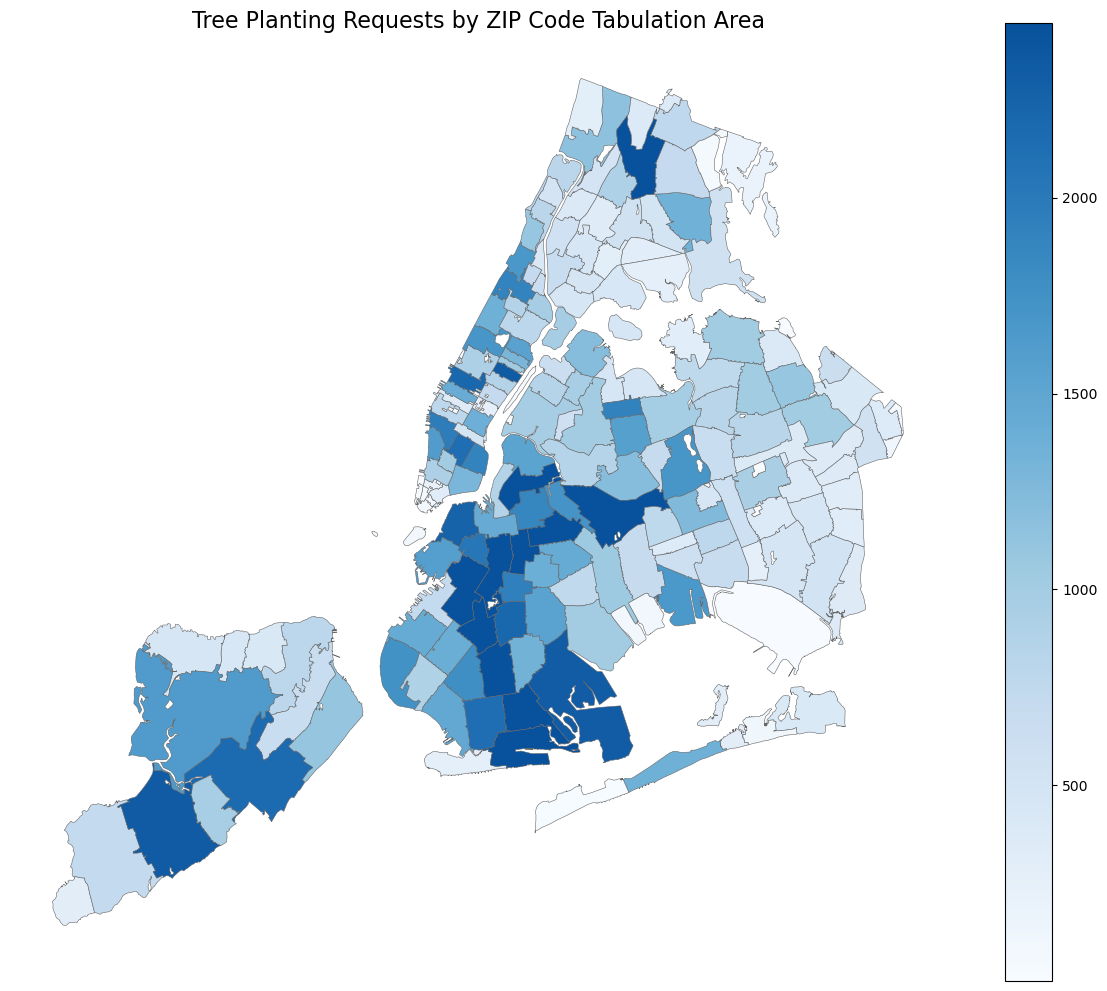

In [67]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create a custom color normalization to handle outliers better
vmin = df['counts'].min()
vmax = df['counts'].quantile(0.95)  # Using 95th percentile to avoid extreme outliers
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Create a custom colormap that transitions from light to dark
colors_list = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c']
cmap = LinearSegmentedColormap.from_list('custom_blue_cmap', colors_list)

# Plot the map with counts using the geometry from the GeoDataFrame
dfg.plot(column='counts', cmap=cmap, linewidth=0.4, edgecolor='#666666', 
    ax=ax, legend=True, norm=norm)#, legend_kwds={'shrink': 0.7, 'label': 'Forestry Service Requests'})

# Add title and labels
ax.set_title('Tree Planting Requests by ZIP Code Tabulation Area', fontsize=16)

# Remove axis ticks for cleaner map
ax.set_xticks([])
ax.set_yticks([])
sns.despine(left=True, bottom=True)

# Show the plot
plt.tight_layout()
# plt.show()

plt.savefig('figures/Tree_Planting_Requests_by_ZCTA.pdf', dpi=600, bbox_inches='tight')


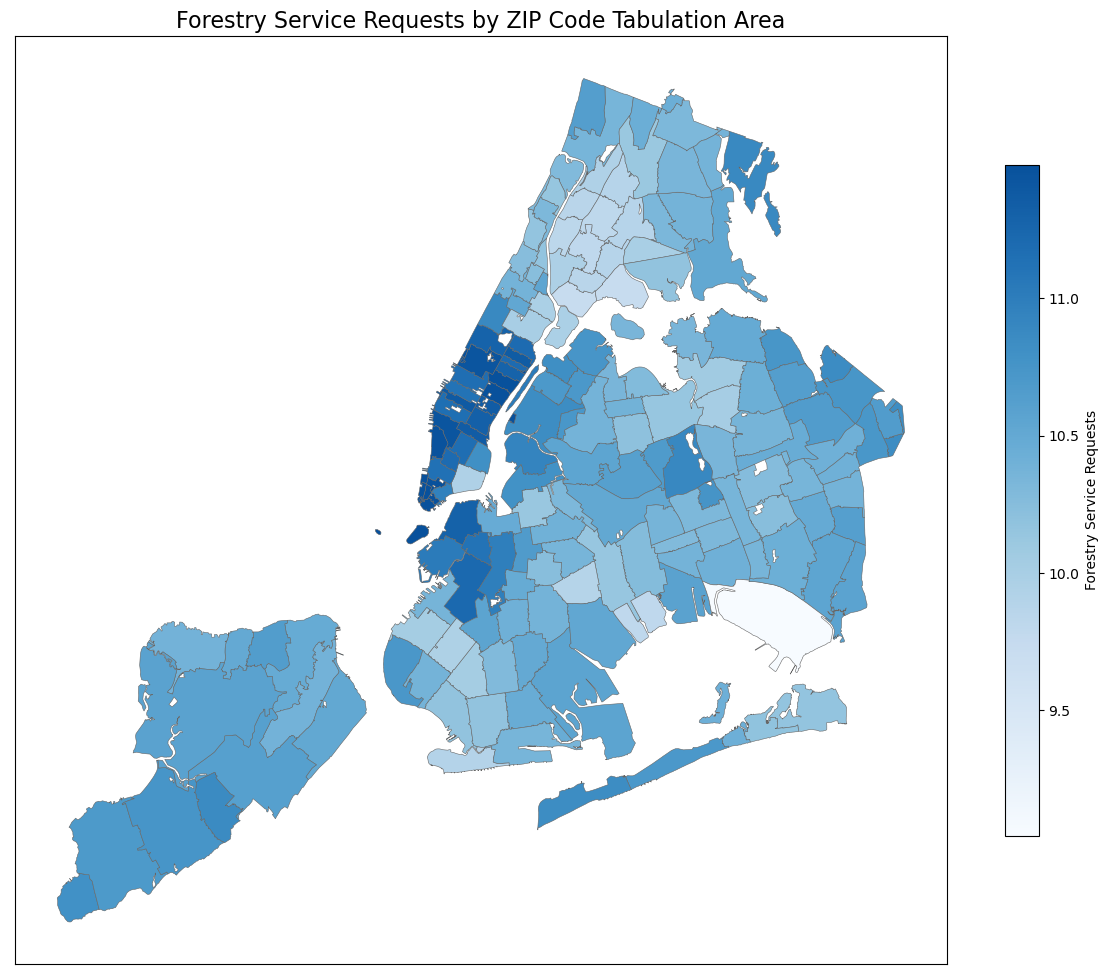

In [57]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create a custom color normalization to handle outliers better
vmin = df['log_median_income'].min()
vmax = df['log_median_income'].quantile(0.95)  # Using 95th percentile to avoid extreme outliers
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Create a custom colormap that transitions from light to dark
colors_list = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c']
cmap = LinearSegmentedColormap.from_list('custom_blue_cmap', colors_list)

# Plot the map with log_median_income using the geometry from the GeoDataFrame
dfg.plot(column='log_median_income', cmap=cmap, linewidth=0.4, edgecolor='#666666', 
    ax=ax, legend=True, norm=norm, legend_kwds={'shrink': 0.7, 'label': 'Forestry Service Requests'})

# Add title and labels
ax.set_title('Forestry Service Requests by ZIP Code Tabulation Area', fontsize=16)

# Remove axis ticks for cleaner map
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# regression of counts by Population and income_median using statsmodels formula
import statsmodels.formula.api as smf

# Define the formula
formula = "counts ~ log_population + HVI_rank"

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Display the summary
print(model.summary())
# # Check for multicollinearity

# # Create a dataframe with the independent variables
# X = df[['Population', 'Income_Median']].dropna()

# # Calculate VIF for each predictor
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# print("\nVariance Inflation Factors:")
# print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                 counts   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     25.14
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.39e-10
Time:                        18:54:35   Log-Likelihood:                -1496.0
No. Observations:                 182   AIC:                             2998.
Df Residuals:                     179   BIC:                             3008.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2893.5998    617.001     -4.